In [44]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [45]:
def load_data():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    
    train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255
    test_images = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255
    
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)
    
    return (train_images, train_labels), (test_images, test_labels)

In [46]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [47]:
def initialize_parameters(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

In [48]:
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

In [49]:
def forward_propagation(X, parameters):
    cache = {}
    A = X.T  # Transpose to match dimensions
    L = len(parameters) // 2
    
    for l in range(1, L + 1):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        if l == L:
            A = softmax(Z)
        else:
            A = relu(Z)
        cache['A' + str(l)] = A
        cache['Z' + str(l)] = Z
    
    return A, cache

In [50]:
def compute_cost(AL, Y):
    m = Y.shape[0]
    cost = -np.sum(Y.T * np.log(AL + 1e-8)) / m
    return cost

In [51]:
def backward_propagation(parameters, cache, X, Y):
    grads = {}
    L = len(parameters) // 2
    m = X.shape[0]
    AL = cache['A' + str(L)]
    
    # Gradient of the cost with respect to ZL
    dZL = AL - Y.T
    grads['dW' + str(L)] = np.dot(dZL, cache['A' + str(L-1)].T) / m
    grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m
    grads['dZ' + str(L)] = dZL
    
    for l in reversed(range(1, L)):
        dA = np.dot(parameters['W' + str(l+1)].T, grads['dZ' + str(l+1)])
        dZ = dA * (cache['Z' + str(l)] > 0)
        if l == 1:
            grads['dW' + str(l)] = np.dot(dZ, X) / m
        else:
            grads['dW' + str(l)] = np.dot(dZ, cache['A' + str(l-1)].T) / m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m
        grads['dZ' + str(l)] = dZ
    
    return grads

In [52]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]
    return parameters

In [53]:
def model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000):
    parameters = initialize_parameters(layers_dims)
    for i in range(num_iterations):
        AL, cache = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters

In [54]:
layers_dims = [28*28, 128, 64, 10]

In [55]:
parameters = model(train_images, train_labels, layers_dims, learning_rate=0.0075, num_iterations=3000)

Cost after iteration 0: 2.408698987650588
Cost after iteration 100: 1.7444539500340712
Cost after iteration 200: 1.2626825508604214
Cost after iteration 300: 0.9411628168587882
Cost after iteration 400: 0.7561813578351437
Cost after iteration 500: 0.6458082697264462
Cost after iteration 600: 0.5744915130700011
Cost after iteration 700: 0.5251987598558477
Cost after iteration 800: 0.4891386404309964
Cost after iteration 900: 0.4615189400958959
Cost after iteration 1000: 0.4396307809508983
Cost after iteration 1100: 0.42177082736263966
Cost after iteration 1200: 0.4068389277453677
Cost after iteration 1300: 0.39411125784485906
Cost after iteration 1400: 0.38308949224608935
Cost after iteration 1500: 0.3734134557489879
Cost after iteration 1600: 0.3647963064941081
Cost after iteration 1700: 0.3570437947459586
Cost after iteration 1800: 0.3500030451713692
Cost after iteration 1900: 0.34355088715644194
Cost after iteration 2000: 0.33759345258222456
Cost after iteration 2100: 0.3320598780371

In [57]:
parameters

{'W1': array([[-0.01778644,  0.10165011, -0.0111943 , ..., -0.00681784,
         -0.02394121, -0.01328579],
        [-0.04913371, -0.0138688 , -0.01528757, ..., -0.02304195,
         -0.02140202,  0.02637353],
        [-0.06462951, -0.12003306, -0.05094044, ...,  0.09526301,
         -0.03673406, -0.01588653],
        ...,
        [ 0.03600941, -0.00493351,  0.1019486 , ...,  0.09756482,
         -0.01322272, -0.05189042],
        [ 0.00923974, -0.01245591, -0.0025821 , ...,  0.04000789,
         -0.07562513, -0.11395914],
        [ 0.05070632, -0.04297205, -0.03523336, ..., -0.0165102 ,
          0.00812793, -0.07799272]]),
 'b1': array([[ 0.01924624],
        [ 0.00970421],
        [ 0.00403837],
        [ 0.01010987],
        [ 0.01926404],
        [ 0.04769548],
        [-0.03630403],
        [ 0.00344651],
        [ 0.02479132],
        [ 0.01353765],
        [ 0.0630609 ],
        [ 0.00059001],
        [ 0.01149652],
        [ 0.03316169],
        [ 0.01792519],
        [ 0.0142

In [58]:
def predict(X, parameters):
    AL, _ = forward_propagation(X, parameters)
    predictions = np.argmax(AL, axis=0)
    return predictions

In [59]:
train_predictions = predict(train_images, parameters)
test_predictions = predict(test_images, parameters)

In [60]:
train_accuracy = np.mean(train_predictions == np.argmax(train_labels, axis=1))
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis=1))

In [61]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.916
Test Accuracy: 0.9193


In [63]:
import matplotlib.pyplot as plt

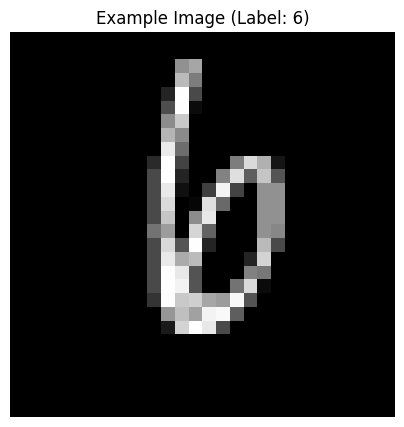

In [65]:
example_index = np.random.randint(0, test_images.shape[0])
example_image = test_images[example_index].reshape(28, 28)
example_label = np.argmax(test_labels[example_index])

plt.figure(figsize=(5, 5))
plt.imshow(example_image, cmap='gray')
plt.title(f'Example Image (Label: {example_label})')
plt.axis('off')
plt.show()

In [66]:
example_prediction = np.argmax(forward_propagation(test_images[example_index:example_index+1], parameters)[0])
print(f"True label: {example_label}")
print(f"Predicted label: {example_prediction}")

True label: 6
Predicted label: 6


In [67]:
train_predictions = np.argmax(forward_propagation(train_images, parameters)[0], axis=0)
test_predictions = np.argmax(forward_propagation(test_images, parameters)[0], axis=0)

train_accuracy = np.mean(train_predictions == np.argmax(train_labels, axis=1))
test_accuracy = np.mean(test_predictions == np.argmax(test_labels, axis=1))

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9160
Test Accuracy: 0.9193
